
# Assignment 3  <font color="blue"> (15 points) </font>
 
***

### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. 
    
  Good luck! 

In [ ]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, plot_roc_curve, classification_report
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, scale
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.decomposition import PCA

## **Part A** <font color="blue">(5 points)</font>

1. **<font color="blue">(1 point)</font>** Generate 100 points equally distanced from $-20$ to $20$ and save them in a `numpy` array `x1`. Now, create $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively. 
3. **<font color="blue">(1 point)</font>** Create your response `y`, a new `numpy` array, defined as $y= 1.75 + 5 x_1 + 0.05 x_3 - 10.3 x_5 + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, 4)$.
4. **<font color="blue">(2 points)</font>** Using $5$-fold cross-validation, with a reasonable train-test proportion, train a **lasso** regression model including all $x_1, x_2, x_3 , x_4 , x_5$, and for $10$ different  pre-determined tuning parameters. 
5. **<font color="blue">(1 point)</font>** Plot the **cross-validated mean squared errors** vs the tuning parameter's values
 and chose the best tuning parameter based on the plot. Does the best model chosen perform **variable selection**?

**<font color="blue">Part A.1** <font color="black">Generate 100 points equally distanced from  −20  to  20  and save them in a numpy array x1. Now, create  4  more numpy arrays by raising x1 to the power of  2,3,4,5 , and call them x2, x3, x4 and x5, respectively.


In [ ]:
# Return evenly spaced numbers over a specified interval.
x1 = np.linspace(-20, 20, num=100, endpoint=True, retstep=False, dtype=None, axis=0)


In [ ]:
# Check the variable x1
print(x1)

[-20.         -19.5959596  -19.19191919 -18.78787879 -18.38383838
 -17.97979798 -17.57575758 -17.17171717 -16.76767677 -16.36363636
 -15.95959596 -15.55555556 -15.15151515 -14.74747475 -14.34343434
 -13.93939394 -13.53535354 -13.13131313 -12.72727273 -12.32323232
 -11.91919192 -11.51515152 -11.11111111 -10.70707071 -10.3030303
  -9.8989899   -9.49494949  -9.09090909  -8.68686869  -8.28282828
  -7.87878788  -7.47474747  -7.07070707  -6.66666667  -6.26262626
  -5.85858586  -5.45454545  -5.05050505  -4.64646465  -4.24242424
  -3.83838384  -3.43434343  -3.03030303  -2.62626263  -2.22222222
  -1.81818182  -1.41414141  -1.01010101  -0.60606061  -0.2020202
   0.2020202    0.60606061   1.01010101   1.41414141   1.81818182
   2.22222222   2.62626263   3.03030303   3.43434343   3.83838384
   4.24242424   4.64646465   5.05050505   5.45454545   5.85858586
   6.26262626   6.66666667   7.07070707   7.47474747   7.87878788
   8.28282828   8.68686869   9.09090909   9.49494949   9.8989899
  10.3030303 

In [ ]:
# Check if variable are 100 observations
len(x1)

100

In [ ]:
# Create variables x2, x3, x4, x5
x2 = x1**2
x3 = x1**3
x4 = x1**4
x5 = x1**5

In [ ]:
# Check the variable x2
print(x2)

[4.00000000e+02 3.84001632e+02 3.68329762e+02 3.52984389e+02
 3.37965514e+02 3.23273135e+02 3.08907254e+02 2.94867871e+02
 2.81154984e+02 2.67768595e+02 2.54708703e+02 2.41975309e+02
 2.29568411e+02 2.17488011e+02 2.05734109e+02 1.94306703e+02
 1.83205795e+02 1.72431385e+02 1.61983471e+02 1.51862055e+02
 1.42067136e+02 1.32598714e+02 1.23456790e+02 1.14641363e+02
 1.06152433e+02 9.79900010e+01 9.01540659e+01 8.26446281e+01
 7.54616876e+01 6.86052444e+01 6.20752984e+01 5.58718498e+01
 4.99948985e+01 4.44444444e+01 3.92204877e+01 3.43230283e+01
 2.97520661e+01 2.55076013e+01 2.15896337e+01 1.79981635e+01
 1.47331905e+01 1.17947148e+01 9.18273646e+00 6.89725538e+00
 4.93827160e+00 3.30578512e+00 1.99979594e+00 1.02030405e+00
 3.67309458e-01 4.08121620e-02 4.08121620e-02 3.67309458e-01
 1.02030405e+00 1.99979594e+00 3.30578512e+00 4.93827160e+00
 6.89725538e+00 9.18273646e+00 1.17947148e+01 1.47331905e+01
 1.79981635e+01 2.15896337e+01 2.55076013e+01 2.97520661e+01
 3.43230283e+01 3.922048

**<font color="blue">Part A.2** <font color="black">Create your response y, a new numpy array, defined as  y=1.75+5x1+0.05x3−10.3x5+ε , where  ε∼N(0,4) .

In [ ]:
np.random.seed(11)                   # We fix the seed at 11
mu, sigma = 0, np.sqrt(0.4)          # sigma is the standard deviation for the np.random.normal()
n = 100                              # 100 observations
eps = np.random.normal(mu, sigma, n) # create variable eps


In [ ]:
# Create the variable y (response)
y = 1.75 + (5 * x1) + (0.05 * x3) - (10.3 * x5) + eps

In [ ]:
# Check the response y
print(y)

[ 3.29595029e+07  2.97620611e+07  2.68177293e+07  2.41111713e+07
  2.16276903e+07  1.93531989e+07  1.72742219e+07  1.53778755e+07
  1.36518526e+07  1.20844127e+07  1.06643701e+07  9.38107503e+06
  8.22440481e+06  7.18474745e+06  6.25299108e+06  5.42051228e+06
  4.67915746e+06  4.02123073e+06  3.43948283e+06  2.92710011e+06
  2.47768693e+06  2.08524909e+06  1.74419211e+06  1.44929557e+06
  1.19570575e+06  9.78923951e+05  7.94790016e+05  6.39467286e+05
  5.09436360e+05  4.01473131e+05  3.12642369e+05  2.40279753e+05
  1.81982159e+05  1.35591221e+05  9.91828902e+04  7.10512491e+04
  4.96978778e+04  3.38172491e+04  2.22799983e+04  1.41324688e+04
  8.56139716e+03  4.90280153e+03  2.61698685e+03  1.27462126e+03
  5.48945869e+02  1.96342796e+02  5.29260940e+01  7.55329788e+00
 -1.51435448e+00 -6.98486966e-03  3.13658523e+00  4.38914458e+00
 -3.29085353e+00 -4.89510125e+01 -1.93264279e+02 -5.44692978e+02
 -1.27029848e+03 -2.61412910e+03 -4.90017068e+03 -8.55780349e+03
 -1.41291471e+04 -2.22766

**<font color="blue">Part A.3** <font color="black">Using  5 -fold cross-validation, with a reasonable train-test proportion, train a lasso regression model including all  x1,x2,x3,x4,x5 , and for  10  different pre-determined tuning parameters.

In [ ]:
# Create dictionary d with the 5 features
d = {'x1':x1,
     'x2':x2,
     'x3':x3,
     'x4':x4,
     'x5':x5}

# Create a datafram for the 5 features  
X = pd.DataFrame(data=d)
X.head()

,x1,x2,x3,x4,x5
0,-20.000000,400.000000,-8000.000000,160000.000000,-3.200000e+06
1,-19.595960,384.001632,-7524.880475,147457.253752,-2.889566e+06
2,-19.191919,368.329762,-7068.955033,135666.813773,-2.603707e+06
3,-18.787879,352.984389,-6631.827921,124597.979123,-2.340932e+06
4,-18.383838,337.965514,-6213.103384,114220.688466,-2.099815e+06


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) # 80% training and 20% test
print(X_train.shape,  y_train.shape, X_test.shape, y_test.shape)

(80, 5) (80,) (20, 5) (20,)


In [ ]:
# Return evenly spaced numbers over a specified interval.
tuning = np.linspace(0.01, 1200, num=10, endpoint=True, retstep=False, dtype=None, axis=0)
tuning

array([1.00000000e-02, 1.33342222e+02, 2.66674444e+02, 4.00006667e+02,
       5.33338889e+02, 6.66671111e+02, 8.00003333e+02, 9.33335556e+02,
       1.06666778e+03, 1.20000000e+03])

In [ ]:
str(format(i, '.2f'))

'1200.00'

In [ ]:
MSE=[]

# Create a loop for the Lasso Regression and Cross-Validation with different tuning parameter
for i in tuning:
    # Fit the Lasso Regression model with different tuning
    lasso_reg = Lasso(alpha=i, random_state=1)
    lasso_reg.fit(X_train, y_train)
    
    # Cross-Validation with MSE
    Mean_MSE_CV = cross_val_score(lasso_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print("Mean of MSE for tuning parameter of " + str(format(i, '.2f')) + ':    ' + str((abs(Mean_MSE_CV.mean()))))
    MSE.append(Mean_MSE_CV.mean())

Mean of MSE for tuning parameter of 0.01:    27983.941460344988
Mean of MSE for tuning parameter of 133.34:    15648.556940095164
Mean of MSE for tuning parameter of 266.67:    8261.237304273976
Mean of MSE for tuning parameter of 400.01:    4405.709527735162
Mean of MSE for tuning parameter of 533.34:    2532.7870286381485
Mean of MSE for tuning parameter of 666.67:    635.842211612765
Mean of MSE for tuning parameter of 800.00:    461.49623882169635
Mean of MSE for tuning parameter of 933.34:    467.07277252962723
Mean of MSE for tuning parameter of 1066.67:    479.1143844354592
Mean of MSE for tuning parameter of 1200.00:    482.17942313211114


**<font color="blue">Part A.4** <font color="black">Plot the cross-validated mean squared errors vs the tuning parameter's values and chose the best tuning parameter based on the plot. Does the best model chosen perform variable selection?

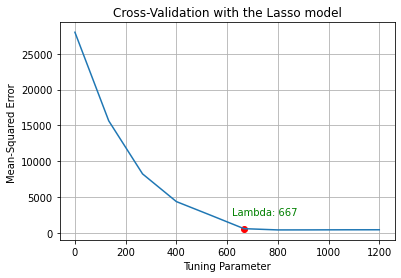

In [ ]:
# Graph for different tuning parameter with Cross-Validation (MSE) for the Lasso Model
fig, ax = plt.subplots(figsize=(6, 4))            
plt.plot(tuning, np.abs(MSE))   
plt.scatter(tuning[5], np.abs(MSE[5]), c='red')
plt.text(tuning[5]*0.93, 2500, 'Lambda: {:.0f}'.format(tuning[5]), c='green')
plt.xlabel('Tuning Parameter')      
plt.ylabel('Mean-Squared Error ')                                    
plt.title('Cross-Validation with the Lasso model')     
plt.grid(True)



---
<font color="blue">The tuning parameter λ regulates the bias-variance tradeoff, in both of them,
by balancing the penalty term. The minimum of test MSE with the cross-validation is the tuning parameter = 800. But test MSE of tuning parameter = 667 is small enough on the graph. I choose that for the model.


---




In [ ]:
# We fit the Lasso model with the train data and tuning parameter = 667.
lasso_reg_model = Lasso(alpha=tuning[5])
lasso_reg_model.fit(X_train, y_train)  
y_train_pred = lasso_reg_model.predict(X_train)




---


<font color="blue">To make sure that our model is not over fitting when it is implemented to the new set of test data, we then implemented K-Fold Cross Validation to know the Mean-Squared Error and the the standard deviation from given 5 different set of validation.


---



In [ ]:
# Cross-Validation with the Lasso Model and training data.
MSE = -cross_val_score(lasso_reg_model, X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
print("Showing all 5 of K-Fold Cross Validation MSE:\n", MSE)
MSE_mean = MSE.mean()
print("\nMean of MSE:\n", MSE_mean)
MSE_std = MSE.std()
print("\nStandard Deviation:\n", MSE_std)

Showing all 5 of K-Fold Cross Validation MSE:
 [359.7397727  894.12876963 423.2810667  908.74265575 593.31879328]

Mean of MSE:
 635.842211612765

Standard Deviation:
 229.96070823926536




---


<font color="blue">From the validation step, we can see that the mean of MSE for our training
model is 636 with standard deviation fo 239 meaning that our model has slight variance in the different set of validation. So, we can be confident enought that our model is not likely overfitting. 


---



In [ ]:
# Predition for y test with the Lasso Model
y_test_pred = lasso_reg_model.predict(X_test)

# The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.
print('MSE for traning:', mean_squared_error(y_train, y_train_pred))
print('MSE for test:', mean_squared_error(y_test, y_test_pred))

MSE for traning: 423.9520417769474
MSE for test: 454.65676906303514


---
<font color="blue"> The training error rate (424) often is quite different from the test error rate (455) and underestimate the later. The best model chosen perform variable selection.

---



In [ ]:
lasso_reg_model.coef_

array([ 0.00000000e+00, -0.00000000e+00,  7.12061501e-02, -3.40742656e-06,
       -1.03000170e+01])

---
<font color="blue"> We see we have two coefficients with zero values. Lasso shrink them to zero. Reminder, the function is y=1.75+5x1+0.05x3−10.3x5+ε and use only 3 features of 5.

---

## **Part B** <font color="blue">(3 points)</font>
For this part upload `Wage.csv`.

1. **<font color="blue">(2 points)</font>** Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen? Make a plot of
the resulting polynomial fit to the data. 
2. **<font color="blue">(1 point)</font>** Fit a step function to predict `wage` using `age` , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.


**<font color="blue">Part B.1</font>** Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen? Make a plot of
the resulting polynomial fit to the data. 

In [ ]:
# Upload the file in Google Colab
from google.colab import files
uploaded = files.upload()

Saving Wage.csv to Wage.csv


In [ ]:
# Read the cvs file and put in variable df
df = pd.read_csv('Wage.csv')
df.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [ ]:
# Drop the first column
df = df.drop(labels=['Unnamed: 0'], axis=1)

In [ ]:
# Check the types of columns in df (age & wage are quantitative)
df.dtypes

year            int64
age             int64
sex            object
maritl         object
race           object
education      object
region         object
jobclass       object
health         object
health_ins     object
logwage       float64
wage          float64
dtype: object

In [ ]:
# For descriptive statistics
df.describe(include='all')

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
count,3000.000000,3000.000000,3000,3000,3000,3000,3000,3000,3000,3000,3000.000000,3000.000000
unique,NaN,NaN,1,5,4,5,1,2,2,2,NaN,NaN
top,NaN,NaN,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,NaN,NaN
freq,NaN,NaN,3000,2074,2480,971,3000,1544,2142,2083,NaN,NaN
mean,2005.791000,42.414667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.653905,111.703608
std,2.026167,11.542406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.351753,41.728595
min,2003.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,20.085537
25%,2004.000000,33.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.447158,85.383940
50%,2006.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.653213,104.921507
75%,2008.000000,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.857332,128.680488


In [ ]:
# Check if we have NaN. No it's clean
df.isnull().values.any()

False

In [ ]:
# Defining independent and dependent variables
data_x = df['age']   # independent variable
data_y = df['wage']  # dependent variable

# Dividing data into train and validation datasets
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.20, random_state = 1) # 80% training and 20% test
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(2400,) (600,) (2400,) (600,)


In [ ]:
# Create a list d for the degrees of polynomial
d= []
for i in range(1,11):
  d.append(i)
d

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# Create a Linear Regressor   
lr = LinearRegression()

# Gives a new shape to an array without changing its data
x_train = np.array(train_x).reshape(-1,1) 
x_test = np.array(test_x).reshape(-1,1) 
y_test = np.array(test_y).reshape(-1,1) 
y_train = np.array(train_y).reshape(-1,1) 

# Create list MSE_train
MSE_train=[]

# Create a loop for the Polynomial for different degrees with Cross-Validation (train data)
for i in d:
  # Pass the order of your polynomial here  
  poly = PolynomialFeatures(i)

  # Convert to be used further to linear regression
  X_transform_train = poly.fit_transform(x_train)

  # Fit this to Linear Regressor
  lr.fit(X_transform_train, y_train) 

  # Cross-Validation with MSE 
  Mean_MSE_train_CV = cross_val_score(lr, X_transform_train, y_train, cv=5, scoring='neg_mean_squared_error')
  print("Mean of MSE for " + str(i) + " degrees : " + str(abs(Mean_MSE_train_CV.mean())))
  MSE_train.append(Mean_MSE_train_CV.mean())

Mean of MSE for 1 degrees : 1682.9301838664494
Mean of MSE for 2 degrees : 1611.9299112243248
Mean of MSE for 3 degrees : 1607.27059443141
Mean of MSE for 4 degrees : 1605.5078559093135
Mean of MSE for 5 degrees : 1605.4416867739305
Mean of MSE for 6 degrees : 1605.0648203884302
Mean of MSE for 7 degrees : 1604.5992771777262
Mean of MSE for 8 degrees : 1604.4712416790426
Mean of MSE for 9 degrees : 1604.745204643408
Mean of MSE for 10 degrees : 1605.1262708178092


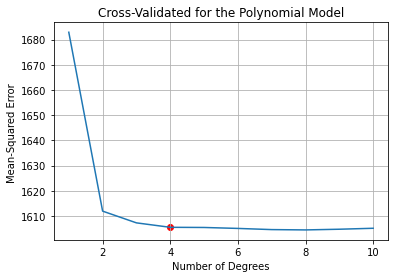

In [ ]:
# Graph for different degrees with Cross-Validation (MSE) for the Polynomial 
fig, ax = plt.subplots(figsize=(6, 4))            
line, = ax.plot(d, np.abs(MSE_train), label='Train')
ax.scatter(d[3], np.abs(MSE_train[3]), c='red')
ax.set_xlabel('Number of Degrees')      
ax.set_ylabel('Mean-Squared Error ')                                    
ax.set_title('Cross-Validated for the Polynomial Model')
plt.grid(True)



---
<font color="blue">The minimum of the MSE is at the degree 8. But MSE of degree 4 is small enough. Generally, for large values of degrees (greater that 3 or 4) the polynimial curve can take on some very strange shapes; this is espicially true near the boundaries of x. We choose the polynomial model with degrees = 4.

---




In [ ]:
# Chose Model with d = 4 
poly_model = PolynomialFeatures(4)
X_transform_train_model = poly_model.fit_transform(x_train)
lrm = LinearRegression()
lrm.fit(X_transform_train_model,y_train) 

y_train_pred = lrm.predict(X_transform_train_model)

In [ ]:
# Variable for the Graph (150 observations only)
x_val_train = np.linspace(train_x.min(),train_x.max(),150)
x_val_train = np.array(x_val_train).reshape(-1,1)       
x_vals_train = poly_model.fit_transform(x_val_train)
yval_train = lrm.predict(x_vals_train) 

x_val_test = np.linspace(test_x.min(),test_x.max(),150)
x_val_test = np.array(x_val_test).reshape(-1,1)       
x_vals_test = poly_model.fit_transform(x_val_test)
yval_test = lrm.predict(x_vals_test) 

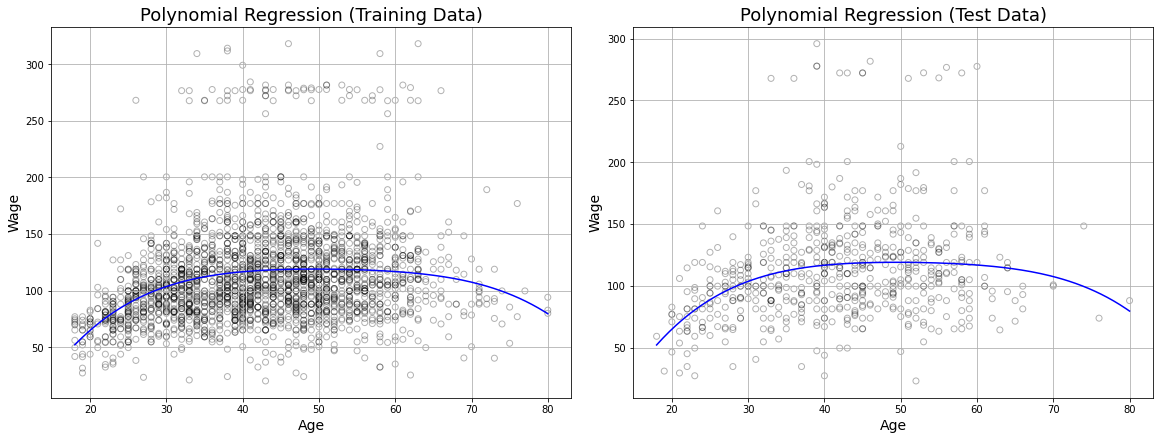

In [ ]:
# We will plot the graph for 150 observations only
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize = (16,6))

axs[0].scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
axs[0].set_xlabel('Age', fontsize=14)
axs[0].set_ylabel('Wage', fontsize=14)
axs[0].set_title('Polynomial Regression (Training Data)', fontsize=18)
axs[0].plot(x_val_train, yval_train, c='b')
axs[0].grid(True)

axs[1].scatter(test_x, test_y, facecolor='None', edgecolor='k', alpha=0.3)
axs[1].set_xlabel('Age', fontsize=14)
axs[1].set_ylabel('Wage', fontsize=14)
axs[1].set_title('Polynomial Regression (Test Data)', fontsize=18)
axs[1].plot(x_val_test, yval_test, c='b')
axs[1].grid(True)

---


<font color="blue">To make sure that our model is not over fitting when it is implemented to the new set of test data, we then implemented K-Fold Cross Validation to know the Mean-Squared Error and the the standard deviation from given 5 different set of validation.


---

In [ ]:
# Cross-Validation with the Polynomial Model od degrees 4.
MSE = -cross_val_score(lrm, X_transform_train_model, y_train, cv = 5, scoring='neg_mean_squared_error')
print("Showing all 5 of K-Fold Cross Validation MSE:\n", MSE)
MSE_mean = MSE.mean()
print("\nMean of MSE:\n", MSE_mean)
MSE_std = MSE.std()
print("\nStandard Deviation:\n", MSE_std)

Showing all 5 of K-Fold Cross Validation MSE:
 [1653.78997243 1741.96806895 1331.81836467 1706.78779681 1593.17507667]

Mean of MSE:
 1605.5078559093135

Standard Deviation:
 145.78629154017068



---


<font color="blue">From the validation step, we can see that the mean of MSE for our training
model is 1605 with standard deviation fo 146 meaning that our model has slight variance in the different set of validation. So, we can be confident enought that our model is not likely overfitting. 


---

In [ ]:
# Predition for y test with the Polynomial Model
X_test_transform_model = poly_model.fit_transform(x_test)
y_test_pred = lrm.predict(X_test_transform_model)

# The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.
print('MSE for traning:', mean_squared_error(y_train, y_train_pred))
print('MSE for test:', mean_squared_error(y_test, y_test_pred))

MSE for traning: 1599.7152637536158
MSE for test: 1555.1412115729179


---
<font color="blue"> The training error rate (1600) is near from the test error rate (1555). The model chosen perform with degrees 4 for the polynomial regression.

---

**<font color="blue">Part B.2</font>** Fit a step function to predict `wage` using `age` , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.

In [ ]:
# Define number of cuts
c= []
for i in range(2,12):
  c.append(i)
c

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [ ]:
# Write a simple wrapper to make statsmodels objects look like sklearn estimators.
# This class contains correct fit and predict methods, and can be used with sklearn.

class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
    
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)

In [ ]:
MSE_train = []

for i in c:

  # Dividing the data into i bins
  df_cut, bins = pd.cut(train_x, i, retbins=True, right=True)
  df_steps = pd.concat([train_x, df_cut, train_y], keys=['age','age_cuts','wage'], axis=1)

  # Create dummy variables for the age groups
  df_steps_dummies = pd.get_dummies(df_cut)
  df_steps_dummies.head()

  #fit3 = sm.GLM(df_steps.wage, df_steps_dummies).fit()

  Mean_MSE_CV = cross_val_score(SMWrapper(sm.GLM), df_steps_dummies, df_steps.wage, cv=5, scoring='neg_mean_squared_error')
  print("Mean of MSE for " + str(i) + " cuts is " + str(abs(Mean_MSE_CV.mean())))
  MSE_train.append(Mean_MSE_CV.mean())

Mean of MSE for 2 cuts is 1737.0355449004578
Mean of MSE for 3 cuts is 1698.0094343466953
Mean of MSE for 4 cuts is 1647.5693839634393
Mean of MSE for 5 cuts is 1642.1198348288613
Mean of MSE for 6 cuts is 1636.3172935933092
Mean of MSE for 7 cuts is 1623.5305251103812
Mean of MSE for 8 cuts is 1610.5923619241407
Mean of MSE for 9 cuts is 1621.4362716020194
Mean of MSE for 10 cuts is 1616.0255733214926
Mean of MSE for 11 cuts is 1615.612223985269


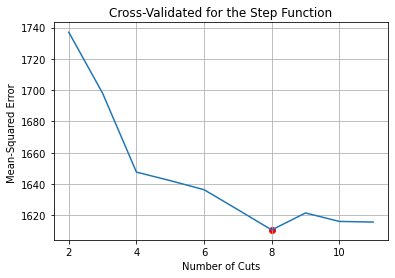

In [ ]:
# Graph for different cuts with Cross-Validation (MSE) for the Step function
fig, ax = plt.subplots(figsize=(6, 4))            
line, = ax.plot(c, np.abs(MSE_train), label='Train')
ax.scatter(c[6], np.abs(MSE_train[6]), c='red')
ax.set_xlabel('Number of Cuts')      
ax.set_ylabel('Mean-Squared Error ')                                    
ax.set_title('Cross-Validated for the Step Function')
plt.grid(True)


---
<font color="blue">The minimum of the MSE is at the number of 8 cuts for the Step Function. 

---

In [ ]:
  # Dividing the data into 8 bins
  df_cut, bins = pd.cut(train_x, 8, retbins=True, right=True)
  df_steps = pd.concat([train_x, df_cut, train_y], keys=['age','age_cuts','wage'], axis=1)

  # Create dummy variables for the age groups
  df_steps_dummies = pd.get_dummies(df_cut)

  fit3 = sm.GLM(df_steps.wage, df_steps_dummies).fit()

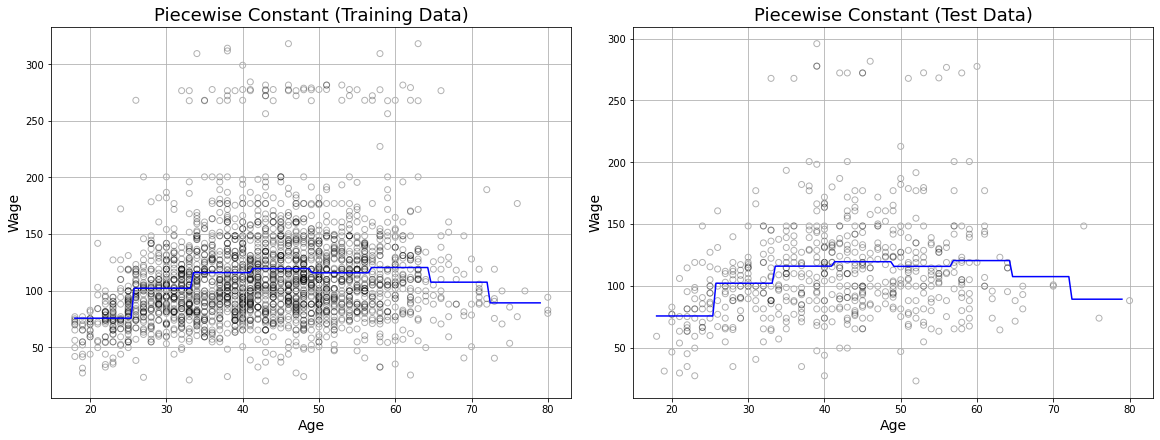

In [ ]:
# We will plot the graph for 150 observations only
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize = (16,6))

xp_train = np.linspace(train_x.min(),train_x.max()-1,150) 
bin_mapping_train = np.digitize(xp_train, bins) 
X_valid_train = pd.get_dummies(bin_mapping_train) 
pred_train = fit3.predict(X_valid_train)

xp_test = np.linspace(test_x.min(),test_x.max()-1,150) 
bin_mapping_test = np.digitize(xp_test, bins) 
X_valid_test = pd.get_dummies(bin_mapping_test) 
pred_test = fit3.predict(X_valid_test)

axs[0].scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
axs[0].set_xlabel('Age', fontsize=14)
axs[0].set_ylabel('Wage', fontsize=14)
axs[0].set_title('Piecewise Constant (Training Data)', fontsize=18)
axs[0].plot(xp_train, pred_train, c='b')
axs[0].grid(True)

axs[1].scatter(test_x, test_y, facecolor='None', edgecolor='k', alpha=0.3)
axs[1].set_xlabel('Age', fontsize=14)
axs[1].set_ylabel('Wage', fontsize=14)
axs[1].set_title('Piecewise Constant (Test Data)', fontsize=18)
axs[1].plot(xp_test, pred_test, c='b')
axs[1].grid(True)

---


<font color="blue">To make sure that our model is not over fitting when it is implemented to the new set of test data, we then implemented K-Fold Cross Validation to know the Mean-Squared Error and the the standard deviation from given 5 different set of validation.


---

In [ ]:
# Cross-Validation with the Piecewise Constant for cuts = 8.
MSE = -cross_val_score(SMWrapper(sm.GLM), df_steps_dummies, df_steps.wage, cv = 5, scoring='neg_mean_squared_error')
print("Showing all 5 of K-Fold Cross Validation MSE:\n", MSE)
MSE_mean = MSE.mean()
print("\nMean of MSE:\n", MSE_mean)
MSE_std = MSE.std()
print("\nStandard Deviation:\n", MSE_std)

Showing all 5 of K-Fold Cross Validation MSE:
 [1665.89292723 1749.71839622 1338.23959216 1698.53006217 1600.58083184]

Mean of MSE:
 1610.5923619241407

Standard Deviation:
 144.5154019461645



---


<font color="blue">From the validation step, we can see that the mean of MSE for our training
model is 1611 with standard deviation fo 145 meaning that our model has slight variance in the different set of validation. So, we can be confident enought that our model is not likely overfitting. 


---

In [ ]:
# Predition for y with the Step Function
pred_train= fit3.predict(df_steps_dummies)

# Dividing the data into 8 bins
df_cut2, bins2 = pd.cut(test_x, 8, retbins=True, right=True)
df_steps2 = pd.concat([test_x, df_cut, test_y], keys=['age','age_cuts','wage'], axis=1)
# Create dummy variables for the age groups
df_steps_dummies2 = pd.get_dummies(df_cut2)
pred_test= fit3.predict(df_steps_dummies2)

# The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.
print('MSE for traning:', mean_squared_error(y_train, pred_train))
print('MSE for traning:', mean_squared_error(y_test, pred_test))

MSE for traning: 1598.5558621488854
MSE for traning: 1574.1182945170967


---
<font color="blue"> The training error rate (1599) is near from the test error rate (1574). The model chosen perform with 8 cuts for the Step Function.

---


## **Part C** <font color="blue">(4 points)</font>
Apply SVM and random forests to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to each other? Which of them yields the best performance?


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving indian_liver_patient.csv to indian_liver_patient.csv


In [ ]:
# Read the data -- into a pandas dataframe 
ilp_1 = pd.read_csv('indian_liver_patient.csv')


In [ ]:
# basic statistics about your data
ilp_1.describe(include= 'all') 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [ ]:
# Fill NA/NaN values for the Albumin and Globulin Ration using the specified method (mean in this case).
ilp_1.fillna(value=ilp_1.mean(), inplace=True)

In [ ]:
# Convert categorical variable into dummy/indicator variables (Gender)
ilp_2=pd.get_dummies(ilp_1, columns=['Gender'], drop_first=True)
ilp_2 = ilp_2[['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Gender_Male', 'Dataset']]

In [ ]:
# basic statistics about your data
ilp_2.describe(include= 'all') 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.756432,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.429603,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000,2.000000



---

*   <font color="blue">**Age:** Age of patients.
*   **Gender:** Gender (1 = Male, 0 = Female) of the patients.
*   **Dataset:** Targuet class (1 = patient with a liver disease, 2 = patient with no disease).
*   **Total Bilirubin:** Liver test related metric; Total of a tetrapyrrole and breakdown product of heme catabolism. This is total of all direct, or conjugated bilirubin and all indirect, unconjugated bilirubon on the blood. Bilirubin is defined as an orange-yellow pigment formed in the liver by the breakdown of hemoglobin and excreted in bile.
*   **Direct Bilirubin:** Liver test related metric; A tetrapyrrode and a breakdown product of heme catabolim.
*   **Alkaline Phosphate:** Liver test related metric; A kind of enzyme found in the body.
*   **Alanine Aminotransferase:** Liver test related metric; A transaminase enzyme.
*   **Aspartate Aminotransferase:** Liver test related metric; It is an enzyme the liver makes.
*   **Total Proteins**: Liver test related metric; It measures the total amount of protein in blood.
*   **Albumin:** Liver test related metric; Globular proteins.
*   **Albumin Globulin Ratio:** Liver test related metric; Compares the amount of albumin with globulin and calculates what is called the A/G ratio.




---













array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb622ac910>,
      dtype=object)

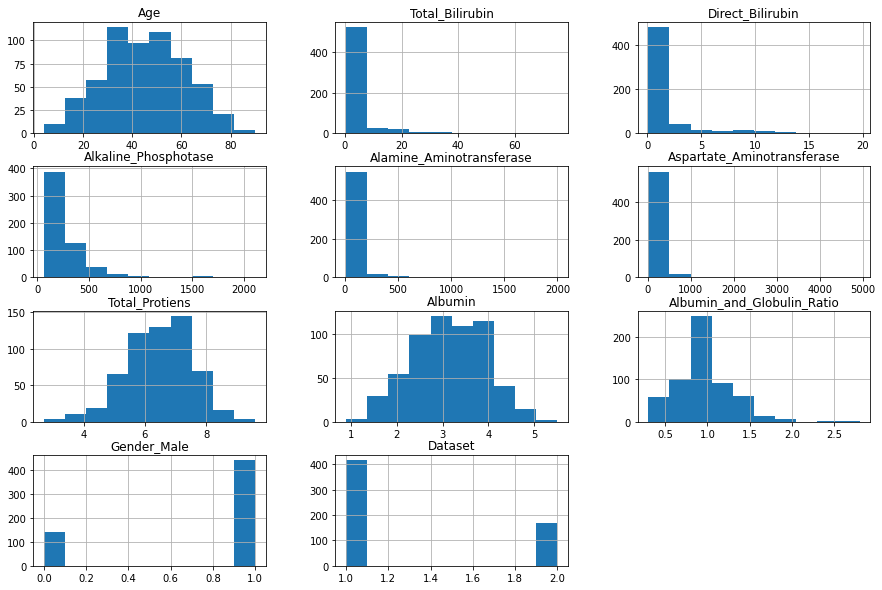

In [ ]:
# Visualization of the data
plt.rcParams['figure.figsize'] = [15, 10]
ilp_2.hist()

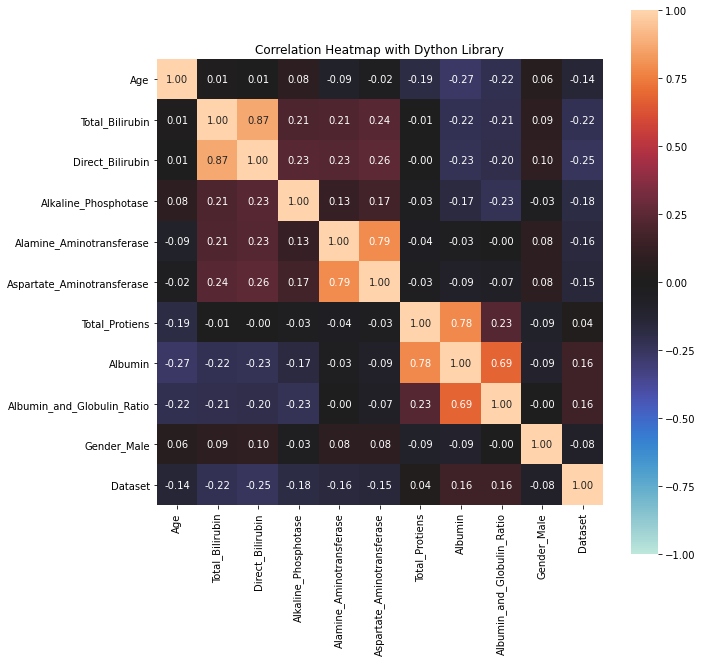

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7feb6c89f390>,
 'corr':                                  Age  Total_Bilirubin  ...  Gender_Male   Dataset
 Age                         1.000000         0.011763  ...     0.056560 -0.137351
 Total_Bilirubin             0.011763         1.000000  ...     0.089291 -0.220208
 Direct_Bilirubin            0.007529         0.874618  ...     0.100436 -0.246046
 Alkaline_Phosphotase        0.080425         0.206669  ...    -0.027496 -0.184866
 Alamine_Aminotransferase   -0.086883         0.214065  ...     0.082332 -0.163416
 Aspartate_Aminotransferase -0.019910         0.237831  ...     0.080336 -0.151934
 Total_Protiens             -0.187461        -0.008099  ...    -0.089121  0.035008
 Albumin                    -0.265924        -0.222250  ...    -0.093799  0.161388
 Albumin_and_Globulin_Ratio -0.216089        -0.206159  ...    -0.003404  0.162319
 Gender_Male                 0.056560         0.089291  ...     1.000000 -0.082416
 Dataset     

In [ ]:
!pip install dython
from dython.nominal import associations

# Correlation with categorical & numerical features
associations(ilp_2, figsize=(10, 10), title='Correlation Heatmap with Dython Library')



---


<font color="blue">For the taguet (Dataset) we have low correlation with the features. The best correlation between features are:


*   <font color="blue">Total Bilirubin & Direct Bilirubin
*   Alkaline & Alamine Aminotransferase
*   Total Proteine & Albumin
*   Albunin & Total Proteine & Albunin and Globulin Ratio
*   Albunin and Globulin Ratio & Albunin



---




In [ ]:
# Defining independent and dependent variables
features = ['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Gender_Male']
X = ilp_2[features]  # independent variable
y = ilp_2['Dataset'] # dependent variable


In [ ]:
# Dividing data into train and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=1) # 30% test and 70% training

# <font color="green"> Random Forest

In [ ]:
# Check Accuracy for Random Forest
rf_1 = RandomForestClassifier(min_samples_leaf=5, random_state=111)
rf_1.fit(X_train, y_train)

# Cross-Validation with the Random Forest Model
accuracies = cross_val_score(rf_1, X_train, y_train, cv = 5)

accuracies_mean = accuracies.mean()
print("\nMean of accuracies:\n", accuracies_mean)
accuracies_std = accuracies.std()
print("\nStandard Deviation:\n", accuracies_std)


Mean of accuracies:
 0.6986148750376392

Standard Deviation:
 0.024193240844194424


Text(0.5, 0, 'Relative Importance')

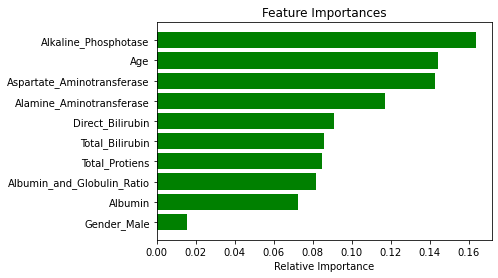

In [ ]:
# Check the feature importances in the random forest
forest = RandomForestClassifier(min_samples_leaf=5, random_state=111)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)
f = ilp_2.columns[0:10]

plt.subplots(figsize=(6, 4)) 
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), f[indices])
plt.xlabel('Relative Importance')

In [ ]:
# Keep only 7 features (most important: drop Gender, drop Total Biliribon (keep Direct Bilirubin), drop Albumin (keep Albumin and Globulin Ration))
X_train_rf = X_train.iloc[:,[0,2,3,4,5,6,8]]
X_test_rf = X_test.iloc[:,[0,2,3,4,5,6,8]]

In [ ]:
X_train_rf.head()

,Age,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio
440,49,0.2,198,23,20,7.0,1.50
110,24,0.2,188,11,10,5.5,0.71
396,74,0.3,175,30,32,6.4,1.10
311,54,12.6,574,43,47,7.2,0.90
395,45,0.2,140,24,20,6.3,1.00


In [ ]:
rf_2 = RandomForestClassifier(min_samples_leaf=5, random_state=111)
rf_2.fit(X_train_rf, y_train)

# Cross-Validation with the Random Forest Model
accuracies = cross_val_score(rf_2, X_train_rf, y_train, cv = 5)

accuracies_mean = accuracies.mean()
print("\nMean of accuracies:\n", accuracies_mean)
accuracies_std = accuracies.std()
print("\nStandard Deviation:\n", accuracies_std)


Mean of accuracies:
 0.7084914182475157

Standard Deviation:
 0.04704983076789878


<font color="blue"> The accuracy increase around 1% but we have double of standard deviation. We keep this selection of features for the next step but try to minimize the variance (We don't want overfitting).

In [ ]:
# Chech for the best number of trees in the forest
estimators = np.arange(10, 61, 10)

for i in estimators:
  rf_3 = RandomForestClassifier(n_estimators=i, min_samples_leaf=5, random_state=111)
  rf_3.fit(X_train_rf, y_train)

  # Cross-Validation with the Random Forest Model
  accuracies = cross_val_score(rf_3, X_train_rf, y_train, cv = 5)

  accuracies_mean = accuracies.mean()
  print('Number of trees = '+ str(i) + ':')
  print("Mean of accuracies for :", accuracies_mean)
  accuracies_std = accuracies.std()
  print("Standard Deviation:", accuracies_std)
  print('\n')

Number of trees = 10:
Mean of accuracies for : 0.6839506172839507
Standard Deviation: 0.028984545323297358


Number of trees = 20:
Mean of accuracies for : 0.6765432098765432
Standard Deviation: 0.030747511892053946


Number of trees = 30:
Mean of accuracies for : 0.6790123456790124
Standard Deviation: 0.04327629093742441


Number of trees = 40:
Mean of accuracies for : 0.6863896416741946
Standard Deviation: 0.041883015277665255


Number of trees = 50:
Mean of accuracies for : 0.686449864498645
Standard Deviation: 0.05235634301970719


Number of trees = 60:
Mean of accuracies for : 0.6913881361035832
Standard Deviation: 0.05855352832793045




<font color="blue"> We use number of trees = 40 for the next step. It's not the best accuracy but near and good compromise with the variance. 

In [ ]:
# Chech for the best depth of trees
depth = np.arange(2, 7)

for i in depth:
  rf_4 = RandomForestClassifier(n_estimators=40, max_depth=i, min_samples_leaf=5, random_state=111)
  rf_4.fit(X_train_rf, y_train)

  # Cross-Validation with the Random Forest Model
  accuracies = cross_val_score(rf_4, X_train_rf, y_train, cv = 5)

  accuracies_mean = accuracies.mean()
  print('Number of depth = ' + str(i) + ':')
  print("Mean of accuracies :", accuracies_mean)
  accuracies_std = accuracies.std()
  print("Standard Deviation:", accuracies_std)
  print('\n')

Number of depth = 2:
Mean of accuracies : 0.713309244203553
Standard Deviation: 0.018748169043500608


Number of depth = 3:
Mean of accuracies : 0.7207768744354108
Standard Deviation: 0.03436523542963473


Number of depth = 4:
Mean of accuracies : 0.7035832580548028
Standard Deviation: 0.0386143377997226


Number of depth = 5:
Mean of accuracies : 0.6888888888888889
Standard Deviation: 0.045689303056813006


Number of depth = 6:
Mean of accuracies : 0.7010840108401084
Standard Deviation: 0.0426633764872095




<font color="blue"> We use depth = 3 (best accuary) for the next step.

In [ ]:
# Chech for the best depth of trees
cr = ['gini','entropy']

for i in cr:
  rf_5 = RandomForestClassifier(n_estimators=40, max_depth=3, min_samples_leaf=5, criterion=i, random_state=111)
  rf_5.fit(X_train_rf, y_train)

  # Cross-Validation with the Random Forest Model
  accuracies = cross_val_score(rf_5, X_train_rf, y_train, cv = 5)

  accuracies_mean = accuracies.mean()
  print('Criterion: ' + str(i) + ':')
  print("Mean of accuracies for :", accuracies_mean)
  accuracies_std = accuracies.std()
  print("Standard Deviation:", accuracies_std)
  print('\n')

Criterion: gini:
Mean of accuracies for : 0.7207768744354108
Standard Deviation: 0.03436523542963473


Criterion: entropy:
Mean of accuracies for : 0.7181571815718157
Standard Deviation: 0.012847731919110634




<font color="blue"> We choose the criterion entropy. Near in the accuracy and reduce the variance.

In [ ]:
# Fit the model with parameter on the train data
rf = RandomForestClassifier(n_estimators=40, max_depth=3, min_samples_leaf=5, criterion='entropy', random_state=111)
rf.fit(X_train_rf, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=111,
                       verbose=0, warm_start=False)




<font color="blue">To make sure that our model is not over fitting when it is implemented to the new set of test data, we then implemented K-Fold Cross Validation to know the Mean of Accuracy and the the standard deviation from given 5 different set of validation.




In [ ]:
# Cross-Validation with the Random Forest Model
accuracies = cross_val_score(rf, X_train_rf,y_train, cv = 5)
print("Showing all 10 of K-Fold Cross Validation accuracies:\n", accuracies)
accuracies_mean = accuracies.mean()
print("\nMean of accuracies:\n", accuracies_mean)
accuracies_std = accuracies.std()
print("\nStandard Deviation:\n", accuracies_std)

Showing all 10 of K-Fold Cross Validation accuracies:
 [0.73170732 0.69512195 0.7195122  0.71604938 0.72839506]

Mean of accuracies:
 0.7181571815718157

Standard Deviation:
 0.012847731919110634






<font color="blue">From the validation step, we can see that the mean of Accuracy for our training
model is 72% with standard deviation for 1% meaning that our model has slight variance in the different set of validation. So, we can be confident enought that our model is not likely overfitting. 




In [ ]:
# Predition for y test 
y_train_pred = rf.predict(X_train_rf)
y_test_pred = rf.predict(X_test_rf)

# The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.
print('Accuracy for traning:', rf.score(X_train_rf, y_train))
print('Accuracy for test:', rf.score(X_test_rf, y_test))

Accuracy for traning: 0.7475490196078431
Accuracy for test: 0.7142857142857143


In [ ]:
# Classification Report for the train data
y_rf_train = rf.predict(X_train_rf)
print(classification_report(y_train, y_rf_train, target_names=['liver disease','no disease']))

               precision    recall  f1-score   support

liver disease       0.74      0.99      0.85       291
   no disease       0.89      0.14      0.24       117

     accuracy                           0.75       408
    macro avg       0.81      0.56      0.54       408
 weighted avg       0.78      0.75      0.67       408



In [ ]:
# Classification Report for the test data
y_rf_test = rf.predict(X_test_rf)
print(classification_report(y_test, y_rf_test, target_names=['liver disease','no disease']))

               precision    recall  f1-score   support

liver disease       0.72      0.97      0.83       125
   no disease       0.50      0.08      0.14        50

     accuracy                           0.71       175
    macro avg       0.61      0.52      0.48       175
 weighted avg       0.66      0.71      0.63       175



---
<font color="blue"> The training accuracy rate (75%) is near from the test accuracy rate (71%). For the patient with a liver disease (dataset = 1), we see good result in the scorebut unfortunately, the score are poor for the patient with no disease (dataset = 2).

<font color="blue">**Some Definitions:**
*   <font color="blue">**Precision:** is the ability of a classifier not to label an instance positive that is actually negative. TP/(TP + FP)
*   **Recall:** is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. TP/(TP+FN)
*   **F1-Score:** The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy. 2*(Recall * Precision) / (Recall + Precision)
*   **Accuracy:** Is the overall proportion of the objects that have been correctly classified.






---

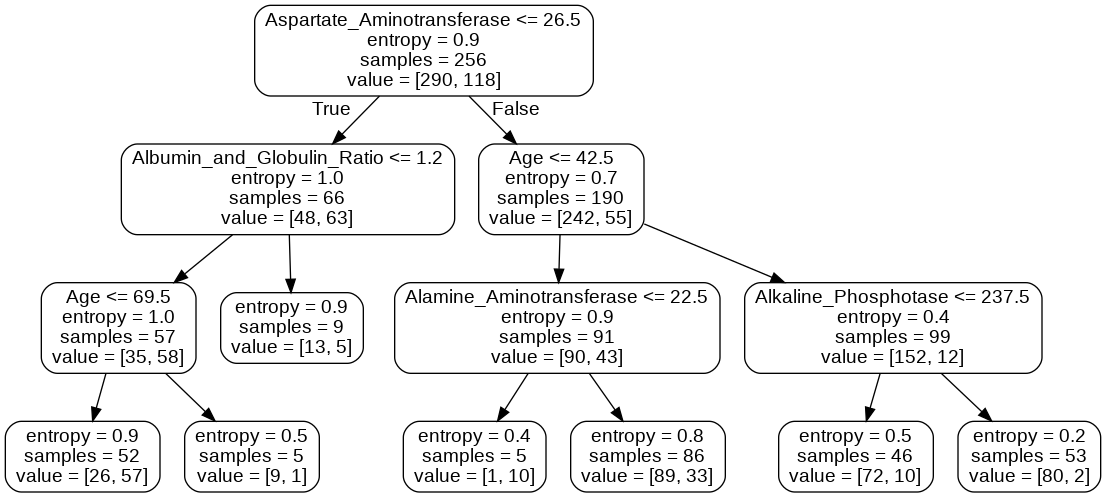

In [ ]:
# Import tools for visualization of one tree in the random forest
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image 

# Pull out one tree from the random forest
tree = rf.estimators_[2]

# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
names = ['Age', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin_and_Globulin_Ratio']
export_graphviz(tree, out_file ='tree.dot', feature_names = names, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')
 
# Show graph
Image(graph.create_png())

 <font color="blue">Entropy is a measure of disorder or uncertainty and the goal in general is to reduce uncertainty. Is measured between 0 (pure the disorder) and 1 (extreme disorder). Note: in the visualization, it's only one of the tree in the random forest.



---



# <font color="green"> Support Vector Machines

In [ ]:
svc_1 = SVC(random_state=111,C=1000000)
svc_1.fit(X_train, y_train)

# Cross-Validation with the Random Forest Model
accuracies = cross_val_score(svc_1, X_train, y_train, cv = 5)

accuracies_mean = accuracies.mean()
print("\nMean of accuracies:\n", accuracies_mean)
accuracies_std = accuracies.std()
print("\nStandard Deviation:\n", accuracies_std)


Mean of accuracies:
 0.688768443239988

Standard Deviation:
 0.048081561344904745


In [ ]:
# Keep only 7 features (most important: drop Gender, drop Total Biliribon (keep Direct Bilirubin), drop Albumin (keep Albumin and Globulin Ration))
X_train_clf = X_train.iloc[:,[0,2,3,4,5,6,8]]
X_test_clf = X_test.iloc[:,[0,2,3,4,5,6,8]]

In [ ]:
svc_2 = SVC(random_state=111,C=1000000)
svc_2.fit(X_train_clf, y_train)

# Cross-Validation with the Random Forest Model
accuracies = cross_val_score(svc_2, X_train_clf, y_train, cv = 5)

accuracies_mean = accuracies.mean()
print("\nMean of accuracies:\n", accuracies_mean)
accuracies_std = accuracies.std()
print("\nStandard Deviation:\n", accuracies_std)


Mean of accuracies:
 0.6962059620596206

Standard Deviation:
 0.031067098431835555


 <font color="blue"> If we select the same features of the Random Forest before, the SVC model is better accuracy and less variation.

In [ ]:
# Specifies the kernel type to be used in the algorithm
# If none is given, 'rbf' will be used
k = ['linear','poly','sigmoid']

for i in k:
  svc_3 = SVC(C=1000000, kernel=i, random_state=111)
  svc_3.fit(X_train_clf, y_train)

  # Cross-Validation with the Random Forest Model
  accuracies = cross_val_score(svc_3, X_train_clf, y_train, cv = 5)

  accuracies_mean = accuracies.mean()
  print(str(i) + ':')
  print("Mean of accuracies:", accuracies_mean)
  accuracies_std = accuracies.std()
  print("Standard Deviation:", accuracies_std)
  print('\n')

linear:
Mean of accuracies: 0.7036434808792532
Standard Deviation: 0.06039583699485108


poly:
Mean of accuracies: 0.6788919000301115
Standard Deviation: 0.02882267775640417


sigmoid:
Mean of accuracies: 0.580517916290274
Standard Deviation: 0.06911506497627772




 <font color="blue"> The Linear kernel is better accuracy but double the standard deviation if we compare with the rbf kernel (last step). We choose Linear kernel for next step.

In [ ]:
# Regularization parameter
c = [10, 100, 1000, 10000, 100000, 1000000]

for i in c:
  svc_4 = SVC(C=i, kernel='linear', random_state=111)
  svc_4.fit(X_train_clf, y_train)

  # Cross-Validation with the Random Forest Model
  accuracies = cross_val_score(svc_4, X_train_clf, y_train, cv = 5)

  accuracies_mean = accuracies.mean()
  print('Regularization parameter c = ' + str(i) + ':')
  print("Mean of accuracies for :", accuracies_mean)
  accuracies_std = accuracies.std()
  print("Standard Deviation:", accuracies_std)
  print('\n')

Regularization parameter c = 10:
Mean of accuracies for : 0.7107497741644083
Standard Deviation: 0.010672106414504461


Regularization parameter c = 100:
Mean of accuracies for : 0.7084613068352905
Standard Deviation: 0.048150078328191674


Regularization parameter c = 1000:
Mean of accuracies for : 0.6913279132791328
Standard Deviation: 0.0439358834103058


Regularization parameter c = 10000:
Mean of accuracies for : 0.7109003312255344
Standard Deviation: 0.03603801444391158


Regularization parameter c = 100000:
Mean of accuracies for : 0.703613369467028
Standard Deviation: 0.05310253195202427


Regularization parameter c = 1000000:
Mean of accuracies for : 0.7036434808792532
Standard Deviation: 0.06039583699485108




<font color="blue"> We choose the regularization parameter = 10000. Best accuracy but more variance.

In [ ]:
# Fit the model with parameter on the train data
svc_m = SVC(C=10000, kernel='linear', random_state=111)
svc_m.fit(X_train_clf, y_train)

SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=111, shrinking=True, tol=0.001,
    verbose=False)

<font color="blue">To make sure that our model is not overfitting when it is implemented to the new set of test data, we then implemented K-Fold Cross Validation to know the Mean of Accuracy and the the standard deviation from given 5 different set of validation.

In [ ]:
# Cross-Validation with the Random Forest Model
accuracies = cross_val_score(svc_m, X_train_clf,y_train, cv = 5)
print("Showing all 5 of K-Fold Cross Validation accuracies:\n", accuracies)
accuracies_mean = accuracies.mean()
print("\nMean of accuracies:\n", accuracies_mean)
accuracies_std = accuracies.std()
print("\nStandard Deviation:\n", accuracies_std)

Showing all 5 of K-Fold Cross Validation accuracies:
 [0.7195122  0.68292683 0.68292683 0.69135802 0.77777778]

Mean of accuracies:
 0.7109003312255344

Standard Deviation:
 0.03603801444391158



<font color="blue">From the validation step, we can see that the mean of Accuracy for our training
model is 71% with standard deviation for 4% meaning that our model has slight variance in the different set of validation. So, we can be confident enought that our model is not likely overfitting. 


In [ ]:
# Predition for y test 
y_train_pred = svc_m.predict(X_train_clf)
y_test_pred = svc_m.predict(X_test_clf)

# Accuracy for training and test
print('Accuracy for traning:', svc_m.score(X_train_clf, y_train))
print('Accuracy for test:', svc_m.score(X_test_clf, y_test))

Accuracy for traning: 0.7328431372549019
Accuracy for test: 0.72


In [ ]:
# Show classification report for training data
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       0.77      0.89      0.83       291
           2       0.56      0.33      0.42       117

    accuracy                           0.73       408
   macro avg       0.66      0.61      0.62       408
weighted avg       0.71      0.73      0.71       408



In [ ]:
# Show classification report for test data
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.76      0.89      0.82       125
           2       0.52      0.30      0.38        50

    accuracy                           0.72       175
   macro avg       0.64      0.59      0.60       175
weighted avg       0.69      0.72      0.69       175



<font color="blue"> Now we try a model with Principal component analysis (PCA). Is a technique for reducing the dimensionality of such datasets.

In [ ]:
# The following independently standardizes each feature (it's the default value 0 for "axis" argument)
X_train_std = scale(X_train_clf.values)
X_test_std = scale(X_test_clf.values)

In [ ]:
n_pc = [2, 3, 4, 5, 6, 7]
k = ['linear', 'poly', 'rbf','sigmoid']

for j in k:
  print(str(j) + ':')
  
  for i in n_pc:
    pca = PCA(n_components=i)

    # Fitting the model on X_ziptrain_std
    pca.fit(X_train_std)

    # Apply the dimensionality reduction on X_train_std
    Z_std = pca.transform(X_train_std) 

    svc_m = SVC(C=100, kernel=j, random_state=111)
    svc_m.fit(Z_std, y_train)

    # Cross-Validation with Accuracy
    scores = cross_val_score(svc_m, Z_std, y_train, cv=5)
    print("Mean Accuracy for " + str(i) + " PCA : " + str(scores.mean()))


linear:
Mean Accuracy for 2 PCA : 0.7132490213791026
Mean Accuracy for 3 PCA : 0.7132490213791026
Mean Accuracy for 4 PCA : 0.7132490213791026
Mean Accuracy for 5 PCA : 0.7132490213791026
Mean Accuracy for 6 PCA : 0.7132490213791026
Mean Accuracy for 7 PCA : 0.7132490213791026
poly:
Mean Accuracy for 2 PCA : 0.7132490213791026
Mean Accuracy for 3 PCA : 0.7132490213791026
Mean Accuracy for 4 PCA : 0.7205359831376091
Mean Accuracy for 5 PCA : 0.7082204155374888
Mean Accuracy for 6 PCA : 0.6934959349593496
Mean Accuracy for 7 PCA : 0.6886479975910871
rbf:
Mean Accuracy for 2 PCA : 0.6961457392351701
Mean Accuracy for 3 PCA : 0.6765432098765432
Mean Accuracy for 4 PCA : 0.6690755796446853
Mean Accuracy for 5 PCA : 0.6715748268593796
Mean Accuracy for 6 PCA : 0.6544113218909967
Mean Accuracy for 7 PCA : 0.669165913881361
sigmoid:
Mean Accuracy for 2 PCA : 0.6152363745859681
Mean Accuracy for 3 PCA : 0.6446552243300211
Mean Accuracy for 4 PCA : 0.6493526046371574
Mean Accuracy for 5 PCA : 0.

<font color="blue"> The PCA don't have an impact on the kernel linear, but with the kernel poly we have a good result of accuracy. We try with kernel poly and 4 PCA in the next step.

In [ ]:
pca = PCA(n_components=4)
pca.fit(X_train_std)
Z_std = pca.transform(X_train_std)

pca.fit(X_test_std)
Z_std_test = pca.transform(X_test_std)

In [ ]:
# Regularization parameter
c = [10, 100, 1000, 10000, 100000]

for i in c:
  svc_6 = SVC(C=i, kernel='poly', random_state=111)
  svc_6.fit(Z_std, y_train)

  # Cross-Validation with the Random Forest Model
  accuracies = cross_val_score(svc_6, Z_std, y_train, cv = 5)

  accuracies_mean = accuracies.mean()
  print('Regularization parameter c = ' + str(i) + ':')
  print("Mean of accuracies:", accuracies_mean)
  accuracies_std = accuracies.std()
  print("Standard Deviation:", accuracies_std)
  print('\n')

Regularization parameter c = 10:
Mean of accuracies: 0.7180668473351399
Standard Deviation: 0.031561241926885385


Regularization parameter c = 100:
Mean of accuracies: 0.7205359831376091
Standard Deviation: 0.03273380586304399


Regularization parameter c = 1000:
Mean of accuracies: 0.7205359831376091
Standard Deviation: 0.028768677095724407


Regularization parameter c = 10000:
Mean of accuracies: 0.725414031918097
Standard Deviation: 0.02357752419408235


Regularization parameter c = 100000:
Mean of accuracies: 0.7205058717253839
Standard Deviation: 0.029128896813901198




<font color="blue"> The best regularization parameter = 10000. Increase the accuracy and decrease the variance.

In [ ]:
# Degree of the polynomial kernel function (‘poly’)
d = [3,4]

for i in d:
  svc_6 = SVC(C=10000, kernel='poly', degree=i, random_state=111)
  svc_6.fit(Z_std, y_train)

  # Cross-Validation with the Random Forest Model
  accuracies = cross_val_score(svc_6, Z_std, y_train, cv = 5)

  accuracies_mean = accuracies.mean()
  print('Degree = ' + str(i) + ':')
  print("Mean of accuracies:", accuracies_mean)
  accuracies_std = accuracies.std()
  print("Standard Deviation:", accuracies_std)
  print('\n')

Degree = 3:
Mean of accuracies: 0.725414031918097
Standard Deviation: 0.02357752419408235


Degree = 4:
Mean of accuracies: 0.70581150255947
Standard Deviation: 0.03341891993810249




<font color="blue"> The degree of polynomial is better at 3. Increase accuracy and decrease the variance.

In [ ]:
# Fit the model with parameter on the train data
svc_pca = SVC(C=10000, kernel="poly", degree=3, random_state=111).fit(Z_std, y_train)

<font color="blue">To make sure that our model is not over fitting when it is implemented to the new set of test data, we then implemented K-Fold Cross Validation to know the Mean of Accuracy and the the standard deviation from given 5 different set of validation.

In [ ]:
# Cross-Validation with the Random Forest Model
accuracies = cross_val_score(svc_pca, Z_std,y_train, cv = 5)
print("Showing all 5 of K-Fold Cross Validation accuracies:\n", accuracies)
accuracies_mean = accuracies.mean()
print("\nMean of accuracies:\n", accuracies_mean)
accuracies_std = accuracies.std()
print("\nStandard Deviation:\n", accuracies_std)

Showing all 5 of K-Fold Cross Validation accuracies:
 [0.70731707 0.75609756 0.74390244 0.69135802 0.72839506]

Mean of accuracies:
 0.725414031918097

Standard Deviation:
 0.02357752419408235


<font color="blue">From the validation step, we can see that the mean of Accuracy for our training
model is 71% with standard deviation for 4% meaning that our model has slight variance in the different set of validation. So, we can be confident enought that our model is not likely overfitting. 

In [ ]:
# Predition for y test 
y_train_pred = svc_pca.predict(Z_std)
y_test_pred = svc_pca.predict(Z_std_test)

# Accuracy for training and test
print('Accuracy for traning:', svc_pca.score(Z_std, y_train))
print('Accuracy for test:', svc_pca.score(Z_std_test, y_test))

Accuracy for traning: 0.7426470588235294
Accuracy for test: 0.7142857142857143


In [ ]:
# Classification report for the training data
print(classification_report(y_train, y_train_pred, target_names=['liver disease','no disease']))

               precision    recall  f1-score   support

liver disease       0.75      0.96      0.84       291
   no disease       0.68      0.20      0.30       117

     accuracy                           0.74       408
    macro avg       0.71      0.58      0.57       408
 weighted avg       0.73      0.74      0.69       408



In [ ]:
# Classification report for the test data
print(classification_report(y_test, y_test_pred, target_names=['liver disease','no disease']))

               precision    recall  f1-score   support

liver disease       0.72      0.98      0.83       125
   no disease       0.50      0.04      0.07        50

     accuracy                           0.71       175
    macro avg       0.61      0.51      0.45       175
 weighted avg       0.66      0.71      0.61       175



<font color="blue"> These 2 models are similar but we see better result with the test data for the classification no disease with the SCV Model. The AUC of SVC Model is 0.76 comparatively to hte PCA & SVC Model (0.66) with the test data. A hight AUC shows a better model. We select the SVC Model to compare with the Random Forest Model.

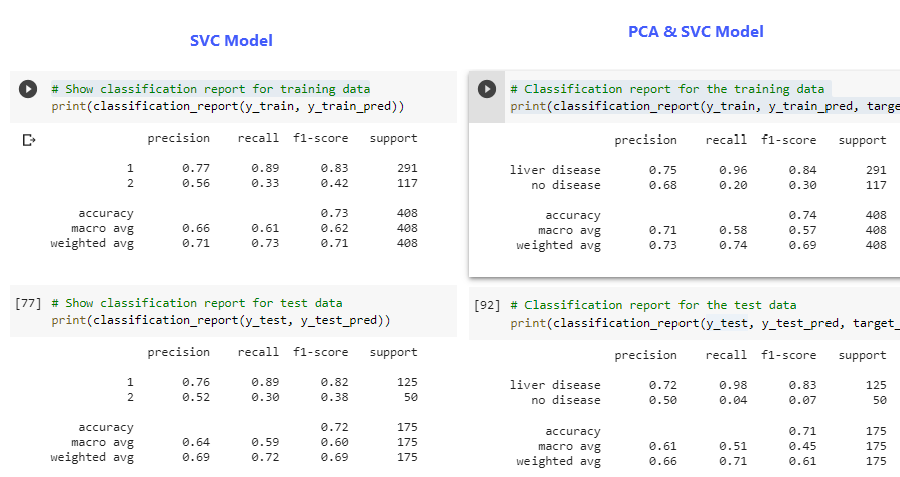

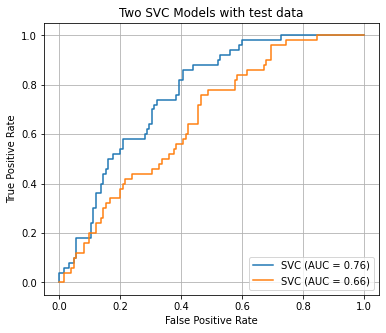

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = plt.gca()
svc_disp = plot_roc_curve(svc_m, X_test_clf, y_test, ax=ax, alpha=1)
svc_disp = plot_roc_curve(svc_pca, Z_std_test, y_test, ax=ax, alpha=1)
plt.title('Two SVC Models with test data')
plt.grid(True)
plt.show()



---

# <font color="green"> Comparaison for the Random Forest & Support Vector Machines Model

<font color="blue"> 
For the Random Forest, we tried to improve the accuracy with theses parameters: selection of the features, the number of trees in the forest, the maximum depth in the forest and the criterion for measure the quality of a split.

<font color="blue"> 
For the Support Vector Machines, we tried to improve the accuracy with theses parameters: selection of the features, the regularization parameter, the kernel use in the algorith and the PCA.

<font color="blue"> 
Maybe with more time we can try the GridSearchCV to improve the accuracy.

> <font color="blue">If we compare the accuracy, the SVC model are better of 1% in the test data. For patient liver disease, the result is good but unfortunately poor for patient with no disease. The biggest gap in these two model is with this class. But again for the SVC model we have better result globaly for this class with the test data. For the AUC, we have better result too with SVC model (+1%).



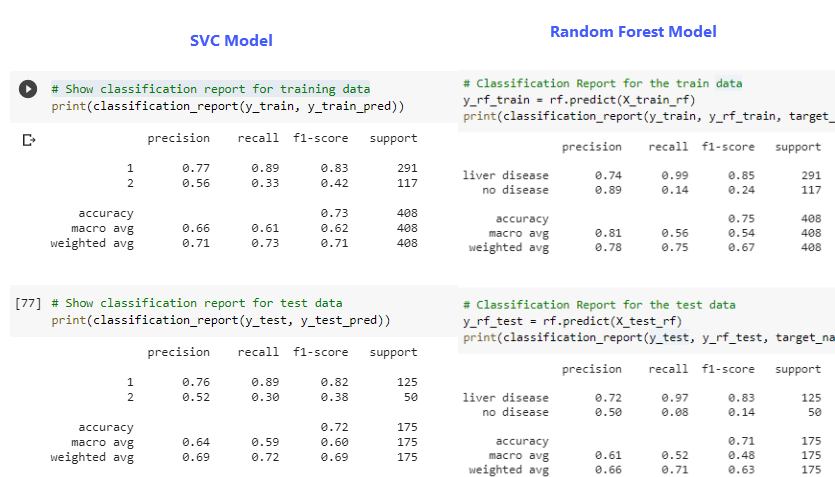

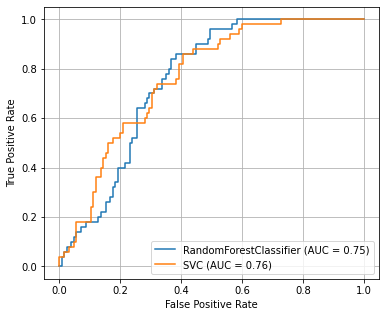

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = plt.gca()
rfc_disp = plot_roc_curve(rf, X_test_rf, y_test, ax=ax, alpha=1)
svc_disp = plot_roc_curve(svc_m, X_test_clf, y_test, ax=ax, alpha=1)
plt.grid(True)
plt.show()


## **Part D** <font color="blue">(3 points)</font>

1. **<font color="blue">(1 point)</font>** Generate $2$-dimentional data with $500$ observations from $3$ Gaussian clusters. 
2. **<font color="blue">(0.5 points)</font>** Use a scatterplot to visualize the produced data. 
3. **<font color="blue">(1 point)</font>** Shuffle the data and use $K$-means, with $K=2,3,4$ to cluster the data.
4. **<font color="blue">(0.5 points)</font>** Visualize the results, separately.  


**<font color="blue">Part D.1</font>** Generate $2$-dimentional data with $500$ observations from $3$ Gaussian clusters. 

In [21]:
# Parameters of the simulated mutivariate gaussian distribution
mean_d1 = [0, 0]
mean_d2 = [7.5, 7.55]
mean_d3 = [15, 0.5]
cov = [[1, 0], [0, 1]] 

np.random.seed(1)
x1, y1 = np.random.multivariate_normal(mean_d1, cov, 167).T
x2, y2 = np.random.multivariate_normal(mean_d2, cov, 167).T
x3, y3 = np.random.multivariate_normal(mean_d3, cov, 166).T

x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)

In [22]:
data = pd.DataFrame(data=np.hstack((x.reshape(-1,1), y.reshape(-1,1))),columns=['x','y'])

In [23]:
data.head()

,x,y
0,1.624345,-0.611756
1,-0.528172,-1.072969
2,0.865408,-2.301539
3,1.744812,-0.761207
4,0.319039,-0.249370


**<font color="blue">Part D.2</font>** Use a scatterplot to visualize the produced data. 

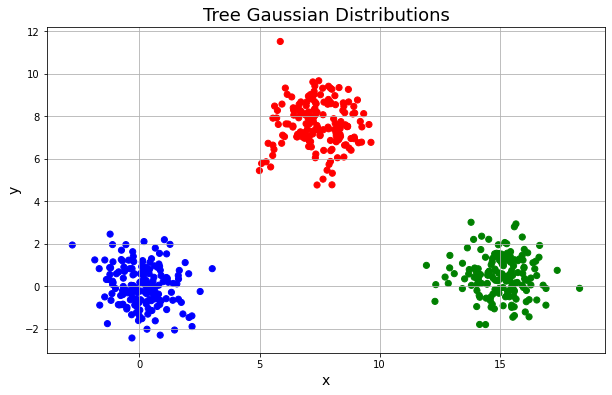

In [24]:
color = np.array(["blue" for i in range(167)]+["red" for i in range(167)]+["green" for i in range(166)]) 

# Plot
fig, ax = plt.subplots(figsize=(10, 6))  
plt.scatter(data['x'], data['y'],color=color,s=150, marker=".")
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Tree Gaussian Distributions', fontsize=18)
plt.grid(True)

**<font color="blue">Part D.3</font>** Shuffle the data and use $K$-means, with $K=2,3,4$ to cluster the data.

In [25]:
# Use shuffle on the data
from sklearn.utils import shuffle
data_1 = shuffle(data, random_state=111)

In [26]:
# Shuffle arrays or sparse matrices in a consistent way
data_1.head()

,x,y
292,8.661440,7.522471
337,14.101317,0.819657
430,14.022227,0.671957
399,15.725551,0.175796
380,16.539207,-0.648704


In [33]:
from sklearn.cluster import KMeans

def KMeans_Clusters(k, rtrn):
  'cluster for k-means'

  # Number of clusters
  kmeans = KMeans(n_clusters=k)

  # Fitting the input data
  kmeans = kmeans.fit(data_1)

  # Getting the cluster labels
  labels = kmeans.predict(data_1)

  # Centroid values
  centroids=kmeans.cluster_centers_
  
  if rtrn =='centroids':
    return centroids
  if rtrn =='labels':
    return labels

In [34]:
c={}
for i in range(2,5):
  globals()['c'+str(i)] = KMeans_Clusters(i, 'centroids')     # The globals() method returns the dictionary of the current global symbol table. 
  c[i] = globals()['c'+str(i)]                                # Populate the values in the key of dictionnary


In [35]:
print(c2)
print(c3)
print(c4)

[[11.23838277  4.06579515]
 [ 0.14072442  0.03215719]]
[[ 0.14072442  0.03215719]
 [15.05312252  0.4848517 ]
 [ 7.44648578  7.62529582]]
[[ 6.83498296  8.04909908]
 [15.05312252  0.4848517 ]
 [ 0.14072442  0.03215719]
 [ 8.29385396  7.03802559]]


In [36]:
l={}
for i in range(2,5):
  globals()['l'+str(i)] = KMeans_Clusters(i, 'labels')        # The globals() method returns the dictionary of the current global symbol table. 
  l[i] = globals()['l'+str(i)]                                # Populate the values in the key of dictionnary

In [37]:
print(l4)

[2 1 1 1 1 1 1 1 2 0 1 1 0 2 0 0 0 2 3 1 2 2 1 0 0 0 0 1 0 3 3 2 3 2 1 0 0
 2 1 1 0 3 1 0 3 0 2 3 1 3 0 2 1 3 0 0 0 3 1 3 3 0 0 1 0 1 1 0 1 0 1 1 3 3
 2 3 0 0 3 1 1 0 1 2 0 0 0 0 1 1 3 0 2 0 3 1 0 1 1 3 3 0 2 3 3 1 1 1 0 3 2
 2 0 3 1 3 2 3 1 1 1 2 0 0 2 1 2 3 3 0 0 3 2 1 0 1 0 1 0 3 0 1 3 0 2 0 0 1
 3 2 0 3 0 0 0 1 0 0 0 1 3 3 3 3 3 2 0 3 1 1 3 1 1 0 0 1 3 1 3 1 0 0 1 1 1
 0 3 3 3 2 0 0 3 1 0 1 1 1 2 2 3 0 0 0 2 1 3 0 0 0 3 1 0 3 1 1 0 0 0 3 1 0
 3 1 3 1 0 1 3 3 1 0 0 3 0 2 3 1 1 0 2 3 2 2 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1
 0 0 3 2 2 2 2 0 3 1 0 2 1 0 0 1 1 0 0 2 2 1 1 0 0 0 1 0 1 1 1 0 3 3 3 2 3
 0 2 1 0 2 1 1 0 0 2 1 0 2 2 1 0 1 2 0 3 0 3 1 0 0 1 0 0 1 0 0 3 2 0 1 1 2
 2 2 3 1 0 1 2 0 1 0 2 1 0 1 1 0 0 3 1 3 3 1 1 0 0 1 1 1 1 1 0 0 0 1 0 2 0
 0 3 3 1 0 0 1 1 3 1 1 1 0 3 1 2 1 1 1 1 0 3 1 3 1 1 1 1 0 0 0 0 2 1 1 3 0
 3 0 1 1 0 0 2 0 0 3 1 2 0 0 3 3 0 2 1 3 0 1 0 0 0 3 1 1 2 1 3 0 2 1 1 0 1
 1 0 3 0 0 3 2 1 0 1 0 1 3 1 2 0 3 2 0 0 1 1 0 1 1 3 1 2 2 1 0 3 0 0 1 3 3
 2 1 1 3 2 0 1 1 3 1 0 3 

**<font color="blue">Part D.4</font>** Visualize the results, separately. 

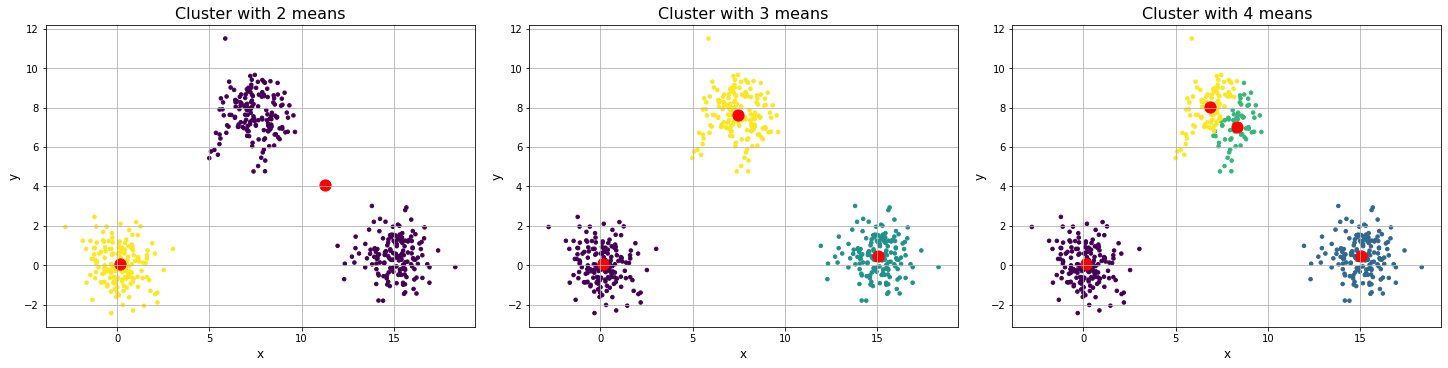

In [38]:
# Plot
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(20,5))

axs[0].scatter(data_1['x'], data_1['y'],c=l2,s=50, marker=".")
axs[0].scatter(c2[:,0], c2[:,1], c='r', s=500, marker = ".") # marker: shape of points
axs[0].set_xlabel('x', fontsize=12)
axs[0].set_ylabel('y', fontsize=12)
axs[0].set_title('Cluster with 2 means', fontsize=16)
axs[0].grid(True)

axs[1].scatter(data_1['x'], data_1['y'],c=l3,s=50, marker=".")
axs[1].scatter(c3[:,0], c3[:,1], c='r', s=500, marker = ".") # marker: shape of points
axs[1].set_xlabel('x', fontsize=12)
axs[1].set_ylabel('y', fontsize=12)
axs[1].set_title('Cluster with 3 means', fontsize=16)
axs[1].grid(True)

axs[2].scatter(data_1['x'], data_1['y'] ,c=l4,s=50, marker=".")
axs[2].scatter(c4[:,0], c4[:,1], c='r', s=500, marker = ".") # marker: shape of points
axs[2].set_xlabel('x', fontsize=12)
axs[2].set_ylabel('y', fontsize=12)
axs[2].set_title('Cluster with 4 means', fontsize=16)
axs[2].grid(True)